This notebook shifts eke and features one day prior to enable it for use as an input feature.

For EKE tendency

In [1]:
import xarray as xr


def shift_data_left_keep_time_coords(ds, dim: str = "time", steps: int = 1):
    """Shift data earlier along `dim` without changing coordinates.

    Works for both `xr.Dataset` and `xr.DataArray` because both implement
    `.shift()` and `.isel()`.

    After shifting, `steps` values at the end have no source data; they are dropped.
    """
    # if steps < 0:
    #     raise ValueError("steps must be >= 0")
    # if steps == 0:
    #     return ds

    shifted = ds.shift({dim: -steps})
    return shifted.isel({dim: slice(None, -steps)})


# Example:
# ds_shifted = shift_data_left_keep_time_coords(ds, dim="time", steps=1)


In [22]:
variable = 'coarse_ke'

directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features_take2/SO_JET/coarsened_data/'
filename = f'MINT_1d_0061-0072_{variable}_cg_SO_JET.nc'

ds = xr.open_dataset(directory + filename)
ds_shifted = shift_data_left_keep_time_coords(ds, dim="t", steps=1)

ds_shifted

<xarray.Dataset>
Dimensions:    (t: 4319, y_c: 54, x_c: 60)
Coordinates:
  * t          (t) object 0061-01-02 00:00:00 ... 0072-12-30 00:00:00
    gphit      (y_c, x_c) float64 ...
    glamt      (y_c, x_c) float64 ...
Dimensions without coordinates: y_c, x_c
Data variables:
    coarse_ke  (t, y_c, x_c) float64 0.009059 0.001561 ... 0.0003199 0.0005835

In [23]:
ds[variable + '_shift'] = ds_shifted[variable]

In [16]:
ds

<xarray.Dataset>
Dimensions:    (t: 4320, y_c: 54, x_c: 60)
Coordinates:
  * t          (t) object 0061-01-02 00:00:00 ... 0073-01-01 00:00:00
    gphit      (y_c, x_c) float64 ...
    glamt      (y_c, x_c) float64 ...
Dimensions without coordinates: y_c, x_c
Data variables:
    vor        (y_c, x_c, t) float64 ...
    vor_shift  (y_c, x_c, t) float64 -1.539e-06 -1.328e-06 ... 1.72e-07 nan
Attributes:
    name:         NEMO dataset
    description:  Relative vorticity from coarse_grained                   ge...

In [17]:
ds.to_netcdf(directory + f'MINT_1d_0061-0072_{variable}_cg_SO_JET_with_shifted.nc')

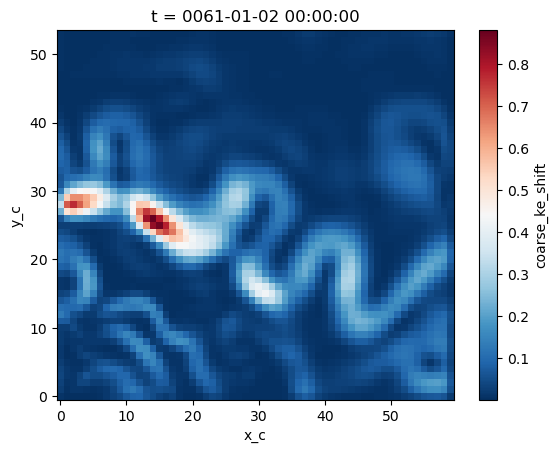

In [24]:
ds[variable + '_shift'].isel(t=0).plot(cmap='RdBu_r')

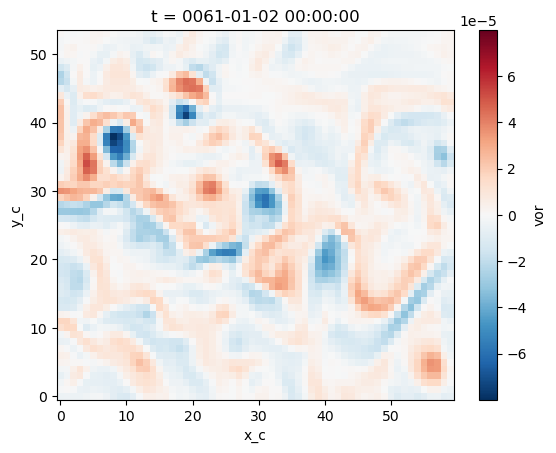

In [19]:
ds[variable].isel(t=0).plot(cmap='RdBu_r')

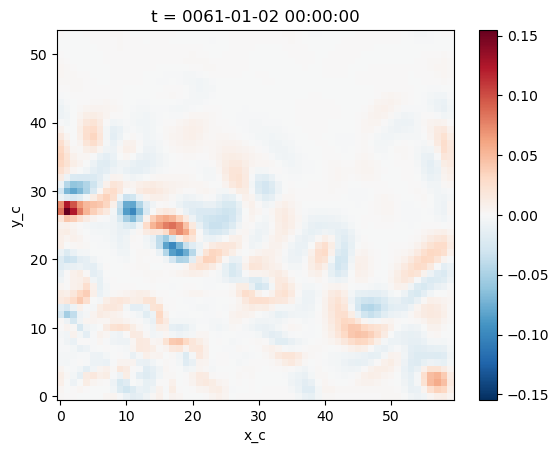

In [25]:
(ds[variable + '_shift'] - ds[variable]).isel(t=0).plot(cmap='RdBu_r')